# Introductory applied machine learning (INFR10069)

# Assignment 2: Linear regression

## Marking Breakdown

**70-100%** results/answer correct plus extra achievement at understanding or analysis of results. Clear explanations, evidence of creative or deeper thought will contribute to a higher grade.

**60-69%** results/answer correct or nearly correct and well explained.

**50-59%** results/answer in right direction but significant errors.

**40-49%** some evidence that the student has gained some understanding, but not answered the questions
properly.

**0-39%** serious error or slack work.

## Mechanics

Fill out this notebook, save it, and **submit it electronically as described below.**

On a DICE environment, open the terminal, navigate to the location of this notebook, and submit this notebook file using the following command:

`submit iaml cw1 05_Assignment_2.ipynb`

What actually happens in the background is that your file is placed in a folder available to markers. If you submit a file with the same name into the same location, **it will *overwrite* your previous submission**. You can check the status of your submissions with the `show_submissions` command.

**Distance Learners:** To copy your work up to DICE (such that you can use the `submit` command) you can use `scp` or `rsync` (you may need to install these yourself). You can copy files up using `student.ssh.inf.ed.ac.uk`, then ssh in to submit, e.g. (in a unix terminal):
```
filename=05_Assignment_2.ipynb
local_scp_filepath=~/git/iaml2017/${filename}
UUN=s0816700
server_address=student.ssh.inf.ed.ac.uk
scp -r ${local_scp_filepath} ${UUN}@${server_address}:${filename}
# rsync -rl ${local_scp_filepath} ${UUN}@${server_address}:${filename}
ssh ${UUN}@${server_address}
ssh student.login
submit iaml cw1 05_Assignment_2.ipynb
```

**Late submissions:** The policy stated in the School of Informatics MSc Degree Guide is that normally you will not be allowed to submit coursework late. See http://www.inf.ed.ac.uk/teaching/years/msc/courseguide10.html#exam for exceptions to this, e.g. in case of serious medical illness or serious personal problems.

**Collaboration:** You may discuss the assignment with your colleagues, provided that the writing that you submit is entirely your own. That is, you should NOT borrow actual text or code from other students. We ask that you provide a list of the people who you've had discussions with (if any).

**Resubmission:** If you submit your file again, the previous submission is **overwritten**. We will mark the version that is in the submission folder at the deadline.

## Important Instructions

1. You *MUST* have your environment set up as in the [README](https://github.com/JamesOwers/iaml2017) and you *must activate this environment before running this notebook*:
```
source activate iaml
cd iaml_2017
jupyter notebook
# Navigate to this file
```

1. Wherever you are required to produce code you should use code cells, otherwise you should use markdown cells to report results and explain answers.

1. The .csv files that you will be using are located at `./datasets` (the `datasets` directory is adjacent to this file).

1. **IMPORTANT:** Keep your answers brief and concise. Most written questions can be answered with 2-3 lines of explanation.

## Imports

Execute the cell below to import all packages you will be using in the rest of the assignemnt.

In [1]:
from __future__ import print_function, division
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, explained_variance_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split, KFold, cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
%matplotlib inline

## Description of the dataset
This assignment is based on the automobile pricing dataset. Our goal will be to predict the price of automobiles based on various attributes. This data set consists of three types of entities: 

1. The specification of an automobile in terms of various characteristics 

1. Assigned insurance risk rating 
   * this rating corresponds to the degree to which the auto is more risky than its price indicates. Cars are initially assigned a risk factor symbol associated with its price. Then, if it is more risky (or less), this symbol is adjusted by moving it up (or down) the scale. Actuaries call this process ”symboling”. A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe. 

1. Normalized losses in use as compared to other cars
  * the third factor is the relative average loss payment per insured vehicle year. This value is normalized for all autos within a particular size classification (two door small, station wagons, sports/speciality, etc...), and represents the average loss per car per year (avg_loss/car/year). 


To save you time and to make the problem manageable with limited computational resources, we preprocessed the original dataset. We removed any instances that had one or more missing values and randomized the data set. The resulting representation is much more compact and can be used directly to perform our experiments.


## 1. Simple Linear Regression [50%]
We will begin by studying a simple Linear Regression model. Such a model will consider the relationship between a dependent (response) variable and only one independent (explanatory) variable. When applying machine learning in practice it can be prudent to start out simple in order to get a feeling for the dataset and for any potential difficulties that might warrant a more sophisticated model. In this Section we will consider one independent variable (i.e. feature) `engine-power` against the dependent variable (i.e. target) `price`.

### ========== Question 1.1 --- [1 mark] ==========
Load the dataset `train_auto_numeric.csv` into a pandas DataFrame called `auto_numeric`. Display the number of data points and attributes in the dataset.

In [2]:
# Your code goes here
data_path = os.path.join(os.getcwd(), 'datasets', 'train_auto_numeric.csv')
auto_numeric = pd.read_csv(data_path, delimiter = ',')

# Number of data points:
print('Number of data points: {}'.format(auto_numeric.shape[0]))
# Number of attributes:
print('Number of attributes: {}'.format(auto_numeric.shape[1]))

#INCLUDE PRICE TOO?

Number of data points: 159
Number of attributes: 16


### ========== Question 1.2 --- [1 mark] ==========
Display the first 8 instances of the dataset.

In [3]:
# Your code goes here
auto_numeric.head(8)

,normalized-losses,wheel-base,length,width,height,engine-size,bore,stroke,compression-ratio,engine-power,peak-rpm,city-mpg,highway-mpg,mean-effective-pressure,torque,price
0,164.0,99.8,176.6,66.2,54.3,8.85,3.19,3.40,10.0,102000.0,5500.0,24.0,30.0,40.52,57.68,13950.0
1,110.0,99.4,162.4,66.4,54.3,15.18,3.19,3.40,8.0,115000.0,5500.0,18.0,22.0,47.39,59.59,17450.0
2,158.0,105.8,192.7,71.4,51.6,15.18,3.94,2.80,8.5,70000.0,4400.0,28.0,30.0,0.85,3344.79,17710.0
3,106.0,86.6,158.7,67.7,55.9,13.74,3.13,3.50,7.8,140000.0,5600.0,32.0,20.0,44.74,68.97,23875.0
4,192.0,101.2,176.8,64.8,54.3,8.67,3.50,2.80,8.8,101000.0,5800.0,23.0,29.0,44.78,53.48,16430.0
5,194.0,110.0,190.9,71.4,58.7,8.67,3.78,3.90,22.5,101000.0,6000.0,47.0,53.0,1.80,1330.28,16925.0
6,188.0,101.2,176.8,64.8,54.3,26.58,3.31,3.19,9.0,121000.0,4250.0,21.0,28.0,7.19,377.06,20970.0
7,150.0,101.2,176.8,64.8,56.1,26.58,3.03,3.19,8.0,134000.0,4400.0,28.0,37.0,57.37,48.20,21105.0


### ========== Question 1.3 --- [1 mark] ==========
Display the summary statistics for the dataset.

In [4]:
# Your code goes here
auto_numeric.describe()

,normalized-losses,wheel-base,length,width,height,engine-size,bore,stroke,compression-ratio,engine-power,peak-rpm,city-mpg,highway-mpg,mean-effective-pressure,torque,price
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,121.955975,98.559748,171.698113,65.729560,53.925157,14.056352,3.294528,3.219874,10.446855,98528.301887,5072.012579,27.113208,32.327044,46.180503,200.055031,11684.723270
std,39.434186,5.803361,12.656791,2.292021,2.410446,17.143568,0.296959,0.381833,4.414796,34123.715967,549.988239,7.848229,8.231998,28.780966,513.289289,6744.910579
min,65.000000,86.600000,141.100000,60.300000,49.400000,3.390000,2.540000,2.070000,7.000000,48000.000000,4150.000000,15.000000,18.000000,0.490000,19.400000,5118.000000
25%,93.000000,94.500000,163.400000,64.000000,52.000000,6.960000,3.050000,3.070000,8.600000,69000.000000,4800.000000,22.000000,26.500000,21.775000,34.140000,7372.000000
50%,110.000000,97.000000,171.700000,65.400000,54.100000,9.030000,3.270000,3.270000,9.000000,92000.000000,5100.000000,26.000000,32.000000,49.800000,55.900000,9233.000000
75%,145.000000,101.200000,177.800000,66.500000,55.600000,14.885000,3.580000,3.410000,9.400000,116000.000000,5450.000000,31.000000,37.000000,68.495000,119.990000,14719.500000
max,256.000000,115.600000,202.600000,71.700000,59.800000,174.160000,3.940000,4.170000,23.000000,200000.000000,6600.000000,49.000000,54.000000,99.850000,3912.870000,42056.000000


### ========== Question 1.4 --- [2 marks] ==========
Produce a scatter plot of `price` against `engine-power`. Label axes appropriately and include a title in your plot.

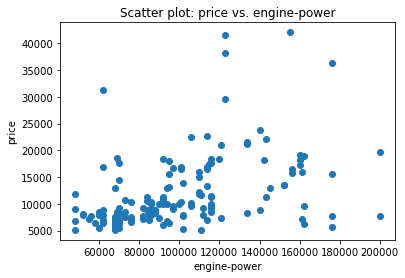

In [5]:
# Your code goes here
ax = plt.scatter(auto_numeric['engine-power'], auto_numeric['price'])
plt.title('Scatter plot: price vs. engine-power')
plt.xlabel('engine-power')
plt.ylabel('price')
plt.show()

### ========== Question 1.5 --- [2 marks] ==========
Do you think that engine-power alone is sufficient for predicting the price? Can you make any other observations on the data from the above plot? Please explain your answer in 2-3 sentences. 

*Your answer goes here*

Engine-power alone is not sufficient for predicting the price. The scatter plot above shows big variations of the price for cars of a very similar engine-power (120000 engine power cars prices hugely vary). Also, cars with the highest engine-power are not the most expensive ones.

Cars with very small engine-power are usually cheaper. However, for bigger values of enginer-power (above 13000) the pattern is not that consistent (doesn't increase that much and it is harder to predict the price).

### ========== Question 1.6 --- [2 marks] ==========
Visualise the distribution of the car prices. Choose a sensible value for the number of bins in the histogram. Again, label axes appropriately and include a title in your plot.

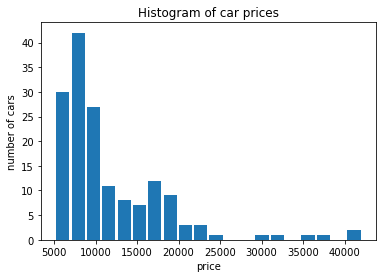

In [6]:
# Your code goes here
plt.hist(auto_numeric['price'], 20, rwidth=0.85)
plt.title("Histogram of car prices")
plt.xlabel("price")
plt.ylabel("number of cars")
plt.show()

### ========== Question 1.7 --- [2 marks] ==========
How could you preprocess the data to improve the performance of linear regression? Don’t do it at this stage, but instead in one sentence explain why you would do what you suggested.

*Your answer goes here*

We might want to investige the data (like in the previous questions) to find the outliers. This might prove very helpful since the linear regression is very sensitive to the outliers (extreme values can significantly influeance the line fit so it will fit better to the value of the outliers). 

### ========== Question 1.8 --- [1 mark] ==========
Now we want to build a simple linear regression model. First we need to define our input and target variables. Store the values of the attribute `engine-power` in a vector `X` and the values of our target variable `price` in a vector `y`.

In [7]:
# Your code goes here
X = auto_numeric['engine-power']
y = auto_numeric['price']

### ========== Question 1.9 --- [1 mark] ==========
For technical reasons, we need to convert `X` into a 2D array, otherwise we will receive an error when trying to use it for building models. Perform this transformation and confirm that the shape of the resulting array is (`n`,1) where `n` is the number of instances in the dataset. 

In [8]:
# Your code goes here
X_2d = X.values.reshape(-1,1)
print(X_2d.shape)

(159, 1)


### ========== Question 1.10 --- [1 mark] ==========
Now we want to use Hold-out validation to split the dataset into training and testing subsets. Use 80% of the data for training and the remaining 20% for testing. Store your data into matrices `X_train`, `X_test`, `y_train`, `y_test`.

In [9]:
# Your code goes here
X_train, X_test, y_train, y_test = train_test_split(X_2d, y, train_size = 0.8, test_size=0.2, random_state=0)

### ========== Question 1.11 --- [2 marks] ==========
By using Scikit-learn's [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) fit a model to the training data. When initialising the model, set the `normalize` parameter to `True` and use default settings for the other parameters.

In [10]:
# Your code goes here
lr = LinearRegression(normalize=True)
lr.fit(X_train,y_train)
#lr.coef_
#lr.intercept_

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

### ========== Question 1.12 --- [2 marks] ==========
By looking into the attributes of your model, write down an equation for predicting the price of a car given the engine-power.

In [11]:
# Your code goes here

#price = coefficient * x + intercept

print('price = {0} * engine-power + {1}'.format(lr.coef_[0], lr.intercept_))

#That is:

#y = lr.coef_ * x + lr.intercept_

# where:
# y is a price
# x is engine-power
# lr.coef_ = 0.08988389
# lr.intercept_ = 2823.1218911028282

price = 0.0898838874387 * engine-power + 2823.1218911


### ========== Question 1.13 --- [3 marks] ==========
What happens to the price as one more unit of engine-power is added? By examining the magnitude of the regression coefficient is it possible to tell whether or not engine-power is an important influential variable on price? Explain your answer in 1-2 sentences.

*Your answer goes here*

If one unit of engine-power is added, the price rises by the coefficient (lr.coef_). 

The coefficient in linear regression represents the mean change in the response variable for one unit of change in the predictor variable while holding other predictors in the model constant. 

lr.coef_ is 0.08988389 which means that for each unit increase in engine-power, the price will rise on average by 0.08988389 which is not much at all. Therefore, (despite big range of engine-power; 4000-20000; 10000 increase in engine-power is only $898 increase which is not that significant in case of car prices), engine-power is not that important influental variable on price (not sufficient to predict the car price).

### ========== Question 1.14 --- [2 marks] ==========
Produce a scatter plot similar to the one in Question 1.4 but use training data only this time. Add the regression line to the plot and show the predictions on the training set by using a different marker. Label axes appropriately and add a title to the graph. 

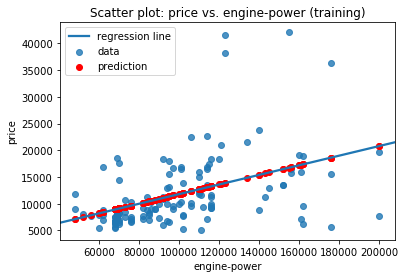

In [12]:
# Your code goes here
prediction = lr.predict(X_train)
#bx = plt.scatter(X_train, y_train)
#cx = plt.scatter(X_train, prediction)
#plt.plot([X_train.min(), X_train.max()], [prediction.min(), prediction.max()], 'k--', lw=1)
#plt.title('Scatter plot: price vs. engine-power (training)')
#plt.xlabel('engine-power')
#plt.ylabel('price')
#plt.show()

g = sns.regplot(X_train, y_train, ci=None)
plt.scatter(X_train, prediction, c='red')
plt.title('Scatter plot: price vs. engine-power (training)')
plt.xlabel('engine-power')
plt.ylabel('price')
plt.legend(["regression line", "data", "prediction"])
plt.show()

### ========== Question 1.15 --- [2 marks] ==========
So far we have used Hold-out validation. Can you think of a disadvantage of using this method, especially when dealing with small datasets?

*Your answer goes here*

In Hold-out validation, we don't train or test the model on every datapoint (data is split into testing and training). Data for testing is not used for training and vice versa like in n-fold validation.
In typical cross-validation, multiple runs are aggregated together; in contrast, the holdout method, in isolation, involves a single run. This means less data points fitted into the model and less accurate model as a result.

The Hold-out approach is not a reasonable choice for a small dataset since we need to hold out enough test cases so that the test results are precise enough to allow generalisation (test and training sets have to be big enough to represent the 'real world'; represent as many possible values as it is possible).

### ========== Question 1.16 --- [1 mark] ==========
Now we want to use k-fold cross-validation to evaluate the performance of the regression model. Famliriase yourself with the sklearn method [`KFold`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html) and make sure you understand the differences between Hold-out and K-fold cross-validation. By using Scikit-learn's [`KFold`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html) class construct a 5-fold cross-validation object. Set the `shuffle` parameter to `True` and `random_state` to `0`. Use the object to print the training and validation indices for the `auto_numeric` dataset (hint: see the `split` method).

In [13]:
# Your code goes here
kf = KFold(n_splits=5, shuffle=True, random_state=0)
for train_index, test_index in kf.split(auto_numeric):
    print("-----------------------------------------")
    print("TRAIN:", train_index, "TEST:", test_index)

-----------------------------------------
TRAIN: [  0   1   2   3   4   5   6   9  10  11  12  13  14  15  16  17  18  20
  21  22  23  25  27  28  29  30  31  32  34  35  36  38  39  41  42  43
  46  47  48  49  50  51  52  53  55  57  58  64  65  66  67  68  69  70
  71  72  73  74  75  76  77  78  79  80  81  82  84  87  88  89  91  92
  93  94  96  97  98  99 100 101 102 103 104 105 106 107 108 109 111 112
 113 114 115 116 117 118 121 122 123 124 125 127 129 130 132 133 135 136
 137 138 139 140 141 143 145 146 147 149 150 151 152 153 154 155 156 157
 158] TEST: [  7   8  19  24  26  33  37  40  44  45  54  56  59  60  61  62  63  83
  85  86  90  95 110 119 120 126 128 131 134 142 144 148]
-----------------------------------------
TRAIN: [  0   1   3   4   5   6   7   8   9  11  12  13  14  15  17  19  20  21
  23  24  25  26  28  29  31  32  33  34  35  36  37  38  39  40  41  42
  44  45  46  47  48  49  50  52  53  54  55  56  57  58  59  60  61  62
  63  64  65  67  68  69  70 

### ========== Question 1.17 --- [3 marks] ==========
By making use of the iterator you constructed in the previous question, loop through the 5 folds and display the mean value of the `price` variable for the training instances in each fold.

In [14]:
# Your code goes here
counter = 1
for train_index, test_index in kf.split(auto_numeric):
    sum = 0
    for i in train_index:
        sum = sum + auto_numeric['price'].values[i]
    mean = sum/len(train_index)
    print('Fold {0}: {1}'.format(counter, mean))
    counter = counter + 1

Fold 1: 11853.2677165
Fold 2: 11635.976378
Fold 3: 11689.8740157
Fold 4: 11709.8267717
Fold 5: 11535.84375


### ========== Question 1.18 --- [3 marks] ==========
Now initialise a new `LinearRegression` model and fit it by making use of the cross-validation iterator, the `X` and `y` arrays defined above and the [`cross_val_predict`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_predict.html) function. Display the shape of your prediction and confirm it has the same dimensionality as your `y` vector.

In [15]:
# Your code goes here

lr_fold = LinearRegression(normalize=True)

y_pred = cross_val_predict(lr_fold, X_2d, y, cv = kf)
print('Shape of the prediction: {}'.format(y_pred.shape))
print('Shape of y: {}'.format(y.shape))

Shape of the prediction: (159,)
Shape of y: (159,)


### ========== Question 1.19 --- [2 marks] ==========
Report the Coefficient of Determination (R^2), Root Mean Squared Error (RMSE), Mean Absolute Error (MAE) and Correlation Coefficient (CC) from the simple linear regression model you build in Question 1.18. *Hint: RMSE is the square root of the Mean Squared Error (MSE). For CC you might find numpy's [`corrcoef`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.corrcoef.html) function useful.* 

In [16]:
# Your code goes here
import math

R2 = r2_score(y,y_pred)
RMSE = math.sqrt(mean_squared_error(y,y_pred))
MAE = mean_absolute_error(y,y_pred)
CC = np.corrcoef(y,y_pred)

print('R2 = {}'.format(R2))
print('RMSE = {}'.format(RMSE))
print('MAE = {}'.format(MAE))
print('CC = {}'.format(CC))

R2 = 0.173005270976
RMSE = 6114.45211862
MAE = 3987.95779619
CC = [[ 1.         0.4171222]
 [ 0.4171222  1.       ]]


### ========== Question 1.20 --- [4 marks] ==========
What do the above metrics intend to measure? Relate the values of CC, MAE and RMSE to the observations you made in Question 1.5. Explain your answer in 1-2 short paragraphs.

*Your answer goes here*

R2  measures how close the data points are to the fitted regression line. The higher value of R2, the better the model fits the data (but not always). In our case, R2 is 0.173 which seems reasonable if we look at the answer from question 1.5. and the regression line in question 1.14. The line is not fitted perfectly.

MAE, RMSE and CC all measure 'distance' between predicted and true values. In general, RMSE is the most sensitive to the outliers. MAE is a bit less sensitive to outliers since we use absolute values in this case (but the magnitude of the outliers is still influencial). CC is insensitive to mean and scale, that is why it is more reliable in evaluating  performance of the model (insensitive to outliers).

The smaller the value of RMSE and MAE, the better. In our case, those values are quite big (6114 and 3987 respectively). This is follows from the scatter plot generated in question 1.4. 

CC is a symetric matrix with diagonal of values 1 (since each attribute is perfectly correlated with itself). We can see that the correlation between engine-power and price is 0.417 (possible values of -1 to 1) which seems correct with the scatter plot in qustion 1.4. (correlation is not perfect but there is some kind of correlation; it is a medium value for a correlation).

### ========== Question 1.21 --- [3 marks] ==========
Show a histogram of the residuals of the linear regression model (i.e. true - predicted values). Label axes appropriately and add a title to your plot. Does the distribution of residuals look like what you expected?

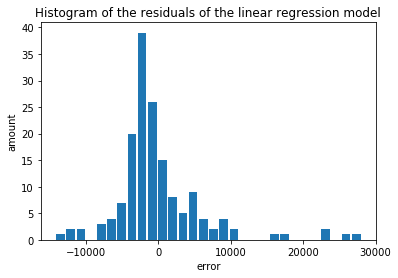

In [17]:
# Your code goes here
plt.hist(y - y_pred, bins=30, rwidth = 0.85)
plt.title('Histogram of the residuals of the linear regression model')
plt.xlabel('error')
plt.ylabel('amount')
plt.show()

*Your answer goes here*

Yes, most of the values are around 0 ([-1000, 1000] interval; however there are some extreme values as well) which seems reasonable. If we take their absolut values, sum them up and divide by number of data points, we should get Mean Absolute Error (MAE). 

Moreover, looking at the value of MAE (3987) we would expect most of the residuals to take values within [-3987, 3987] which is indeed applicable in this case.

### ========== Question 1.22 --- [2 marks] ==========
Load the new dataset `train_auto_base.csv` into a pandas DataFrame `auto_base`. Again by using the `engine-power` attribute as predictor and `price` as target variable build a LinearRegression model on this dataset. Report the R^2, RMSE, MAE and CC metrics for this model by making use of the K-fold CV iterator constructed in Question 1.16.

In [18]:
# Your code goes here
data_path = os.path.join(os.getcwd(), 'datasets', 'train_auto_base.csv')
auto_base = pd.read_csv(data_path, delimiter = ',')

X_base = auto_base['engine-power']
X_base = X_base.values.reshape(-1,1)
y_base = auto_base['price']

kf_base = KFold(n_splits=5, shuffle=True, random_state=0)
lr_base = LinearRegression(normalize=True)
y_base_pred = cross_val_predict(lr_base,X_base,y_base, cv = kf_base)

R2_base = r2_score(y_base,y_base_pred)
RMSE_base = math.sqrt(mean_squared_error(y_base,y_base_pred))
MAE_base = mean_absolute_error(y_base,y_base_pred)
CC_base = np.corrcoef(y_base,y_base_pred)

print('R2 = {}'.format(R2_base))
print('RMSE = {}'.format(RMSE_base))
print('MAE = {}'.format(MAE_base))
print('CC = {}'.format(CC_base))

R2 = -0.00213595381121
RMSE = 6730.84360395
MAE = 4901.86096203
CC = [[ 1.         -0.06191442]
 [-0.06191442  1.        ]]


### ========== Question 1.23 --- [2 marks] ==========
Show a scatter plot of predicted vs. true prices and another one of predicted price vs. engine-power. Use a single plot with two subplots. Label axes appropriately.

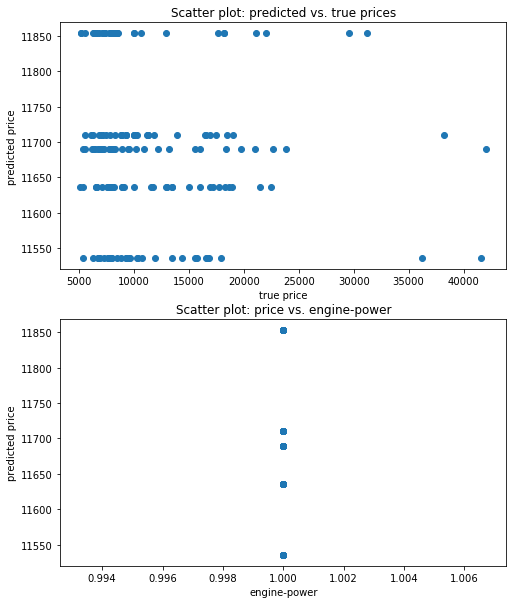

In [19]:
# Your code goes here
plt.subplots(2, figsize=(8,10))
plt.subplot(2,1,1)
plt.title('Scatter plot: predicted vs. true prices')
plt.scatter(y_base, y_base_pred)
plt.xlabel('true price')
plt.ylabel('predicted price')
plt.subplot(2,1,2)
plt.title('Scatter plot: price vs. engine-power')
plt.scatter(X_base, y_base_pred)
plt.xlabel('engine-power')
plt.ylabel('predicted price')
plt.show()

### ========== Question 1.24 --- [3 marks] ==========
What is the simplest baseline model for the purposes of regression? Relate your answer to the regression model you have just built as part of this question. Can the predictions of this model be justified given the procedure you followed to train it?

*Your answer goes here*

The simplest baseline model for the purposes of regression would be to assign the same class to each data point. This is exactly what has been done in the previous model. We used 5-fold cross validation. This simply gave us 5 functions predicting the value of a car. All thos functions assign the same values for their data points. 

Because values of the engine-power for the data is equal to 1, all the functions predict a very similar value for the price of a car.

### ========== Question 1.25 --- [2 marks] ==========
Why do you think this model performs so poorly? (*Hint: Justify your answer by displaying some statistics about the `auto_base` dataset.*)

In [20]:
# Your code goes here
print(auto_base.describe())
auto_base

       engine-power         price
count         159.0    159.000000
mean            1.0  11684.723270
std             0.0   6744.910579
min             1.0   5118.000000
25%             1.0   7372.000000
50%             1.0   9233.000000
75%             1.0  14719.500000
max             1.0  42056.000000


,engine-power,price
0,1.0,13950.0
1,1.0,17450.0
2,1.0,17710.0
3,1.0,23875.0
4,1.0,16430.0
5,1.0,16925.0
6,1.0,20970.0
7,1.0,21105.0
8,1.0,5151.0
9,1.0,6295.0


*Your answer goes here*

This is because engine-power value for each entry in auto_base is 1. This means its mean is equal to 1 and standard deviation is 0. Moreover, with the same engine-power value, the price vaies greatly (5118-42056) which means that cars with the same engine-power significantly differ in price.

Because of the single value of 1 of engine-power for each car, the line is fitted so poorly and the model performs very poorly as well (there is no generalisation because the engine-power value doesn't vary at all, hance engine-power is not a sufficient attribute for predicting the price and there's no other feature to judge on for the prediction).

## 2. Multivariate Linear Regression [50%]
In this Section we will fit a Multivariate Linear Regression model (LinearRegression) to the dataset. In contrast to Part 1, we will now train a model with multiple explanatory variables and ascertain how they affect our ability to predict the retail price of a car. One of our foremost concerns will be to determine exactly which attributes to include in the model and which may be left out.

### ========== Question 2.1 --- [10 marks] ==========
Use the original dataset (`auto_numeric`) and a visualisation tool of your choice to examine whether or not any of the other attributes are particularly good at predicting the price. Can you find any? Do any attributes appear useless at predicting the price? Do any attributes exhibit significant correlations? As you answer these questions, list two attributes for each question but do not modify the dataset at this stage. Of the attributes you listed, which ones could you safely remove? Explain in 4-5 sentences. *Hint: you might find seaborn's [`pairplot`](https://seaborn.github.io/generated/seaborn.pairplot.html?highlight=pairplot#seaborn.pairplot) function useful for this question.*

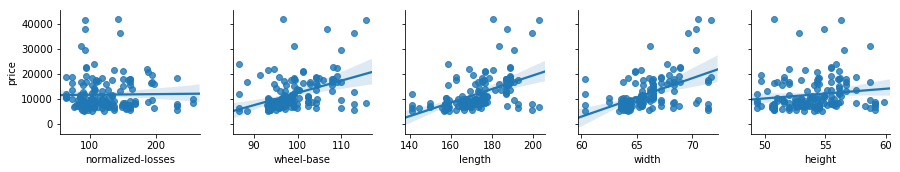

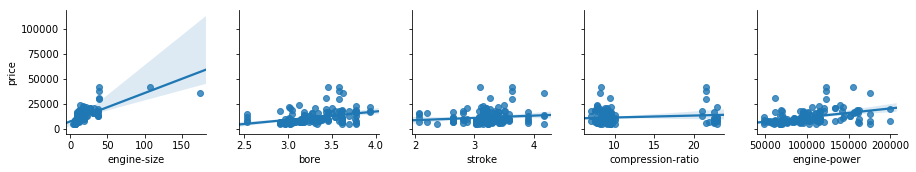

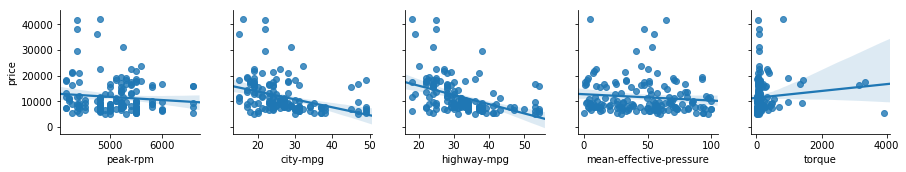

In [21]:
# Your code goes here
g = sns.pairplot(auto_numeric, x_vars = auto_numeric.columns.values[0:5], y_vars=["price"], kind="reg")
h = sns.pairplot(auto_numeric, x_vars = auto_numeric.columns.values[5:10], y_vars=["price"], kind="reg")
f = sns.pairplot(auto_numeric, x_vars = auto_numeric.columns.values[10:15], y_vars=["price"], kind="reg")

*Your answer goes here*

According to the above plot, engine-size attribute is positively correlated with price. This is mainly due to few (2) outliers with very big engines but the rest of the data follows the same trend (the bigger the engine, the more expensive the car gets). This also follows the 'real life' scenario. 

Width and length are also highly correlated with the price. These attributes are related to the size of a car which also matches the 'real life' scenario (big cars are usually more expensive but not always). 

These attributes seems to be the most significant at predicting the price of a car. We can observe a clear pattern of increasing size of a car (width & size) and its engine-power with increasing price. These attributes (picking just those 2/3) are obviously not significant enough to predict the car price on their own but they are very significant at predicting the final price of a car.

Compression-ratio does not seem very helpful with the prediction. There's not clear correlation between this feature and the price. Most values of compression-ratio concentrate within values 0-10 and 20-30 with no clear pattern regarding the price.

Also torque does not seem like a significant attribute since most of the cars (except some outliers) have very small value of torque and their prices vary significantly. In this case, there are very many cars with the same torque and completely different prices.

Also normalize-losses attribute does not show any correlation with price.

These attribute seems the least likely to have any influence of price prediction (the most useless).

### ========== Question 2.2 --- [3 marks] ==========
We will now make a first attempt at building a Multivariate Linear Regression model using all numeric attributes. Initialise a `LinearRegression` model and predict the output by using 5-fold cross-validation and the `cross_val_predict` function.

In [22]:
# Your code goes here
lr_multi = LinearRegression(normalize=True)

X_multi = auto_numeric.drop('price', axis=1)
y_multi = auto_numeric['price']

kf_multi = KFold(n_splits=5, shuffle=True, random_state=0)
y_multi_pred = cross_val_predict(lr_multi,X_multi,y_multi, cv = kf_multi)

### ========== Question 2.3 --- [2 marks] ==========
Display the Root Mean Squared Error (RMSE), Mean Absolute Error (MAE) and Correlation Coefficient (CC).

In [23]:
# Your code goes here
R2_multi = r2_score(y_multi,y_multi_pred)
RMSE_multi = math.sqrt(mean_squared_error(y_multi,y_multi_pred))
MAE_multi = mean_absolute_error(y_multi,y_multi_pred)
CC_multi = np.corrcoef(y_multi, y_multi_pred)

print('R2 = {}'.format(R2_multi))
print('RMSE = {}'.format(RMSE_multi))
print('MAE = {}'.format(MAE_multi))
print('CC = {}'.format(CC_multi))

R2 = 0.486137984457
RMSE = 4819.80464283
MAE = 3050.34459963
CC = [[ 1.          0.74256027]
 [ 0.74256027  1.        ]]


### ========== Question 2.4 --- [2 marks] ==========
 Comment on each metric display above in comparison to what you have obtained for the Simple Linear Regression model in Question 1.19.

*Your answer goes here*

Both values of RMSE and MAE decreased significantly which means that the data was fitted better when all attributes has been considered (smaller distance between predicted value and the true value).

R2 increased which also means that the prediction is also closer to the actual value.

CC increased significantly which indicates higher correlation between predicted price and the actual price of the cars.

Overall, considering more attributes in predicting the price improved the prediction significantly (engine-power attribute alone was not significant enough to predict the price accurately).

### ========== Question 2.5 --- [2 marks] ==========
Examine the histogram for the `engine-size` attribute. Choose a sensible value for the number of bins in the histogram. Label axes appropriately and include a title in your plot.

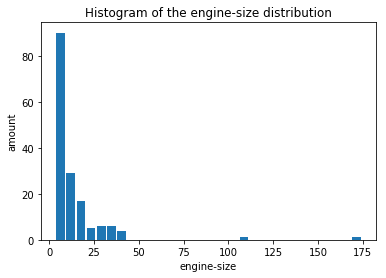

In [24]:
# Your code goes here

plt.hist(auto_numeric["engine-size"], bins=30, rwidth = 0.85)
plt.title('Histogram of the engine-size distribution')
plt.xlabel('engine-size')
plt.ylabel('amount')
plt.show()

### ========== Question 2.6 --- [2 marks] ==========
Is the distribution expected to cause a problem for regression? Explain your answer in 2-3 sentences.

*Your answer goes here*

We can observe 2 cars with significantly big engine-sizes compared to the rest of our data. It seems that these cars can be outliers. They may couse a big problem for our linear-regression classifier since it is very sensitive to outliers (highly depend on mean and variance of input data; it tries to fit the line so it fits all points as close as possible; outliers may shift it so it fits better for their values but it does not necessairly fit better to the other points (realistic values)).

### ========== Question 2.7 --- [3 marks] ==========
Transform this attribute using an appropriate simple technique from the lectures. Plot the histogram of the transformed attribute.

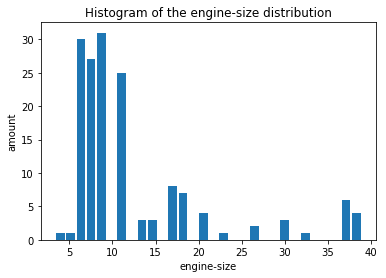

In [33]:
# Your code goes here

auto_numeric_new = auto_numeric.copy(deep=True)
auto_numeric_new = auto_numeric_new[auto_numeric_new["engine-size"] < 55]
plt.hist(auto_numeric_new["engine-size"], bins=30, rwidth = 0.85)
plt.title('Histogram of the engine-size distribution')
plt.xlabel('engine-size')
plt.ylabel('amount')
plt.show()

### ========== Question 2.8 --- [3 marks] ==========
Now re-build a Linear Regression model on the transformed dataset and report the R^2, RMSE, MAE and CC metrics.

In [26]:
# Your code goes here
lr_multi_new = LinearRegression(normalize=True)

X_multi_new = auto_numeric_new.drop('price', axis=1)
y_multi_new = auto_numeric_new['price']

kf_multi_new = KFold(n_splits=5, shuffle=True, random_state=0)
y_multi_new_pred = cross_val_predict(lr_multi_new,X_multi_new,y_multi_new, cv = kf_multi_new)

R2_multi_new = r2_score(y_multi_new,y_multi_new_pred)
RMSE_multi_new = math.sqrt(mean_squared_error(y_multi_new,y_multi_new_pred))
MAE_multi_new = mean_absolute_error(y_multi_new,y_multi_new_pred)
CC_multi_new = np.corrcoef(y_multi_new, y_multi_new_pred)

print('R2 = {}'.format(R2_multi_new))
print('RMSE = {}'.format(RMSE_multi_new))
print('MAE = {}'.format(MAE_multi_new))
print('CC = {}'.format(CC_multi_new))

R2 = 0.591903992276
RMSE = 3829.86789319
MAE = 2717.51808177
CC = [[ 1.          0.77430224]
 [ 0.77430224  1.        ]]


### ========== Question 2.9 --- [3 marks] ==========
How has the performance of your model changed? Explain your answer in 1-2 sentences.

*Your answer goes here*

The value of R2 increased significantly (from 0.486 to 0.592) which means that the prediction is even closer to the actual prices.

Both values for RMSE and MAE significanlty decreased which means that the distance from the predicted prices and the actual prices became even smaller (hence, the prediction is likely to be more accurate).

The value of CC increased (from 0.743 to 0.774) which means that the predictions are even more correlated with the real values than before.

Overall, eliminating the outliers improved the prediction of the model significantly.

### ========== Question 2.10 --- [2 marks] ==========
So far we have performed regression with numeric attributes. We will now attempt to integrate nominal (categorical) attributes into our regression model. 
Load the dataset `train_auto_full.csv` into a pandas DataFrame called `auto_full`. Display the number of samples and attributes in the dataset. Also, display the first 20 instances of the dataset. *Hint: Execute the cell below to change the default for `max_columns` display option in pandas.*

In [27]:
pd.set_option('max_columns', 30)

In [28]:
# Your code goes here
data_path = os.path.join(os.getcwd(), 'datasets', 'train_auto_full.csv')
auto_full = pd.read_csv(data_path, delimiter = ',')

# Number of data points:
print('Number of data points: {}'.format(auto_full.shape[0]))
# Number of attributes:
print('Number of attributes: {}'.format(auto_full.shape[1]))


#auto_full.describe()
#col = auto_full.columns.values
#for i in col:
#    print('{0}: {1}'.format(i,len(np.unique(auto_full[i]))))
auto_full.head(20)

Number of data points: 159
Number of attributes: 27


,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,engine-power,peak-rpm,city-mpg,highway-mpg,symboling,mean-effective-pressure,torque,price
0,164.0,audi,gas,std,4,sedan,fwd,front,99.8,176.6,66.2,54.3,ohc,4,8.85,mpfi,3.19,3.40,10.00,102000.0,5500.0,24.0,30.0,2,40.52,57.68,13950.0
1,110.0,audi,gas,std,4,sedan,4wd,front,99.4,162.4,66.4,54.3,ohc,5,15.18,mpfi,3.19,3.40,8.00,115000.0,5500.0,18.0,22.0,2,47.39,59.59,17450.0
2,158.0,audi,gas,std,4,sedan,fwd,front,105.8,192.7,71.4,51.6,ohc,5,15.18,mpfi,3.94,2.80,8.50,70000.0,4400.0,28.0,30.0,1,0.85,3344.79,17710.0
3,106.0,audi,gas,turbo,4,sedan,fwd,front,86.6,158.7,67.7,55.9,ohc,5,13.74,mpfi,3.13,3.50,7.80,140000.0,5600.0,32.0,20.0,1,44.74,68.97,23875.0
4,192.0,bmw,gas,std,2,sedan,rwd,front,101.2,176.8,64.8,54.3,ohc,4,8.67,mpfi,3.50,2.80,8.80,101000.0,5800.0,23.0,29.0,2,44.78,53.48,16430.0
5,194.0,bmw,gas,std,4,sedan,rwd,front,110.0,190.9,71.4,58.7,ohc,4,8.67,mpfi,3.78,3.90,22.50,101000.0,6000.0,47.0,53.0,0,1.80,1330.28,16925.0
6,188.0,bmw,gas,std,2,sedan,rwd,front,101.2,176.8,64.8,54.3,ohc,6,26.58,mpfi,3.31,3.19,9.00,121000.0,4250.0,21.0,28.0,0,7.19,377.06,20970.0
7,150.0,bmw,gas,std,4,sedan,rwd,front,101.2,176.8,64.8,56.1,ohc,6,26.58,mpfi,3.03,3.19,8.00,134000.0,4400.0,28.0,37.0,0,57.37,48.20,21105.0
8,121.0,chevrolet,gas,std,2,hatchback,fwd,front,88.4,141.1,60.3,53.2,l,3,3.39,2bbl,3.03,3.03,9.50,48000.0,5300.0,47.0,53.0,2,59.33,25.08,5151.0
9,98.0,chevrolet,gas,std,2,hatchback,fwd,front,104.3,155.9,68.3,52.0,ohc,4,6.05,2bbl,3.31,3.47,7.80,70000.0,5000.0,34.0,34.0,1,51.55,36.35,6295.0


### ========== Question 2.11 --- [3 marks] ==========
This dataset contains a mixture of numeric and nominal attributes. Name the variables that you think are categorical. Why can we not use the nominal attributes in their current form for the purposes of regression? 

*Your answer goes here*

Categorical variables:
- make
- fuel-type
- aspiration
- num-of-doors
- body-style
- drive-wheels
- engine-location
- engine-type
- num-of-cylinders
- fuel-system 
- symboling

We cannot use nominal attributes in this form for the purposes of regression because nominal attributes take values of no inherit order or ranking sequence. We simply cannot perform any meaningful calculations on them (bmw + audi = ?; or even num-of-doors: 4 - 2 = 2 but it is not meaningful).

### ========== Question 2.12 --- [5 marks] ==========
Now we want to convert the categorical variables by using [One-Hot-Encoding](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html#sklearn.preprocessing.OneHotEncoder). Familiarise yourself with the class. One limitation with this module is that it can deal only with categorical attributes in integer format (remember that in our example we have attributes in string format). 

Copy the `auto_full` dataframe into a new dataframe `auto_full_edit` and transform the categorical variables by using [Label Encoding](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html). Then transform again the categorical variables by using One-Hot-Encoding. Make sure you don't transform the continuous variables. *Hint: make appropriate use of the `categorical_features` parameter in [`OneHotEncoder`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html#sklearn.preprocessing.OneHotEncoder).*

Store the transformed attributes into a numpy array `X_enc` and display its dimensionality.  


In [40]:
# Your code goes here
auto_full_edit = auto_full.copy(deep=True)
for column in auto_full_edit.drop(['normalized-losses','wheel-base','length','width','height','engine-size','bore','stroke','compression-ratio','engine-power','peak-rpm','city-mpg','highway-mpg','mean-effective-pressure','torque','price'], axis=1): 
    le = LabelEncoder().fit(auto_full_edit[column])
    auto_full_edit[column] = le.transform(auto_full_edit[column])

#auto_full_edit
enc = OneHotEncoder(categorical_features=[1,2,3,4,5,6,7,12,13,15,23]) #indeces of categorical attributes
enc.fit(auto_full_edit)
X_enc = enc.transform(auto_full_edit.drop('price', axis = 1))
print(X_enc.shape)

(159, 70)


### ========== Question 2.13 --- [2 marks] ==========
By using the transformed data train a multivariate linear regression model and by using 5-fold cross-validation report the R^2, RMSE, MAE and CC metrics.

In [41]:
# Your code goes here

lr_multi_edit = LinearRegression(normalize=True)

X_multi_edit = X_enc
y_multi_edit = auto_full_edit['price']

kf_multi_edit = KFold(n_splits=5, shuffle=True, random_state=0)
y_multi_edit_pred = cross_val_predict(lr_multi_edit,X_multi_edit,y_multi_edit, cv = kf_multi_edit)

R2_multi_edit = r2_score(y_multi_edit,y_multi_edit_pred)
RMSE_multi_edit = math.sqrt(mean_squared_error(y_multi_edit,y_multi_edit_pred))
MAE_multi_edit = mean_absolute_error(y_multi_edit,y_multi_edit_pred)
CC_multi_edit = np.corrcoef(y_multi_edit, y_multi_edit_pred)

print('R2 = {}'.format(R2_multi_edit))
print('RMSE = {}'.format(RMSE_multi_edit))
print('MAE = {}'.format(MAE_multi_edit))
print('CC = {}'.format(CC_multi_edit))

R2 = 0.86383451765
RMSE = 2481.07385412
MAE = 1706.44341397
CC = [[ 1.          0.93151735]
 [ 0.93151735  1.        ]]


### ========== Question 2.14 --- [4 marks] ==========
How does this more complex model perform with respect to your best performing model from either question 2.3 or 2.8? List one advantage and one disadvantage of using the more complex model.

*Your answer goes here*

The more complex model seems to perform better than two previous ones from questions 2.3. and 2.8. (in case of R2, MAE and CC).

The value of R2 significantly increased (from 0.592 to 0.864) which means that the prediction is even closer to the actual prices.

The value for MAE and RMSE decreased significantly which means that the distances from the predicted prices and the actual prices became even smaller (hence, the prediction is likely to be more accurate).

The value of CC also increased (from 0.774 to 0.932) which means that the predictions are even more correlated with the real values than before.

Advantage: All measures (R2, MAE, RMSE, CC) improved for the more complex model which indicates that the predictions are more accurate which is the biggest advantage in this case (this is because we can predict the price using more attributes than before).

Disadvantage: Since we have more attributes to consider and our dataset is relatively small (159 examples), it is not representative enough (since we didn't provide enough data for training; not enough to generalise; model is likely overfit the data).

### ========== Question 2.15 --- [4 marks] ==========
Finally, experiment with tree-based regressors (e.g. [`DecisionTreeRegressor`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html), [`RandomForestRegressor`](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)) and report 5-fold cross-validation scores for R^2, RMSE, MAE and CC. Has your performance improved? Explain your answer in 1-2 sentences.

In [42]:
# Your code goes here

dt_multi_dt = RandomForestRegressor()

X_multi_dt = X_enc
y_multi_dt = auto_full_edit['price']

kf_multi_dt = KFold(n_splits=5, shuffle=True, random_state=0)
y_multi_dt_pred = cross_val_predict(dt_multi_dt,X_multi_dt,y_multi_dt, cv = kf_multi_dt)

R2_multi_dt = r2_score(y_multi_dt,y_multi_dt_pred)
RMSE_multi_dt = math.sqrt(mean_squared_error(y_multi_dt,y_multi_dt_pred))
MAE_multi_dt = mean_absolute_error(y_multi_dt,y_multi_dt_pred)
CC_multi_dt = np.corrcoef(y_multi_dt,y_multi_dt_pred)

print('R2 = {}'.format(R2_multi_dt))
print('RMSE = {}'.format(RMSE_multi_dt))
print('MAE = {}'.format(MAE_multi_dt))
print('CC = {}'.format(CC_multi_dt))

R2 = 0.812328066202
RMSE = 2912.7676477
MAE = 1884.82327044
CC = [[ 1.          0.90142616]
 [ 0.90142616  1.        ]]


*Your answer goes here*

Accuracy of the prediction for the model using Random Forrest Regressor decreased compared to linear regression one (considering all the measures). This shows that its performance decreased compared to linear regression model. However, this simple model performs reasonably well (still high value of CC and R2). This might suggest that the Random Forrest regressor is less sensitive to outliers and might be more computationally efficient (due to performance techniques such as pruning).